In [83]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim

# Базовая работа с изображением

In [20]:
image = cv2.imread('sar_2_color.jpg')

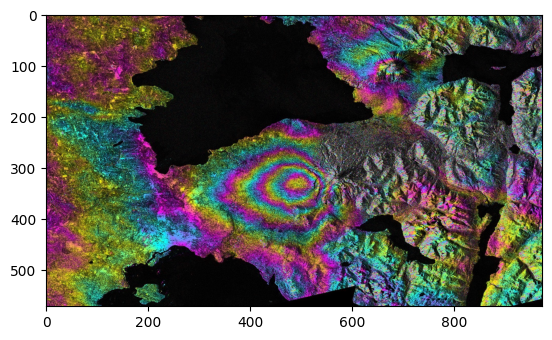

In [21]:
plt.imshow(image)

In [22]:
image.shape # h,w,c

(572, 974, 3)

In [23]:
image[250,250] # b,g,r

array([12, 12, 12], dtype=uint8)

In [24]:
# ROI
img_roi = image[100:200, 500:700]

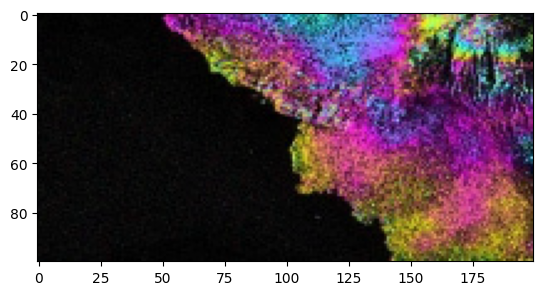

In [25]:
plt.imshow(img_roi)

In [26]:
b,g,r = cv2.split(image)

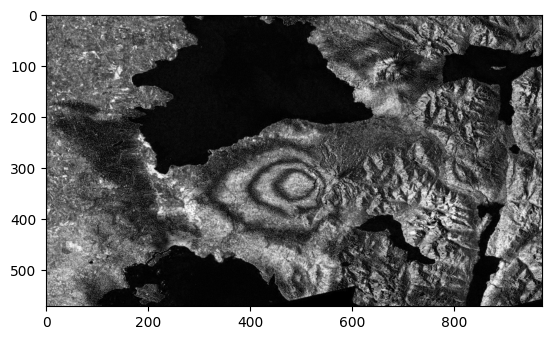

In [27]:
plt.imshow(b, cmap = 'gray')

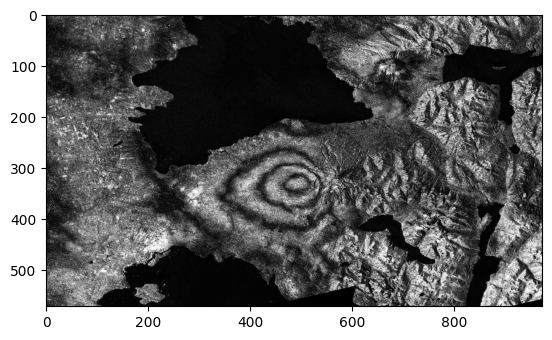

In [28]:
plt.imshow(g, cmap = 'gray')

In [29]:
# alternative approach
b = image[:,:,0]

In [30]:
import copy

image2 = copy.deepcopy(image)

In [31]:
image2[50:100,50:100] = [0,0,0]

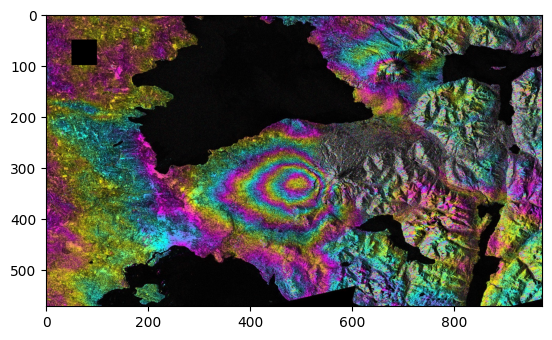

In [32]:
plt.imshow(image2)

In [33]:
# empty image
image_template = np.zeros(image.shape,np.uint8)

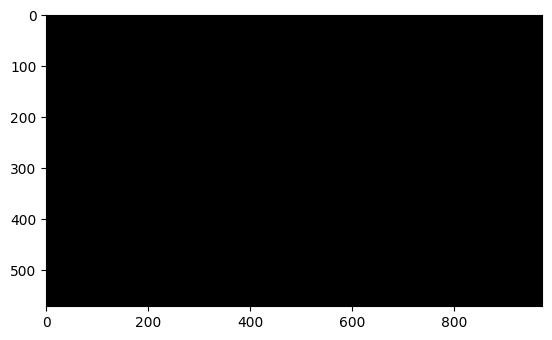

In [34]:
plt.imshow(image_template)

# Конвертация цветовых моделей

In [35]:
image_template[0,0]

array([0, 0, 0], dtype=uint8)

In [36]:
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) 

In [37]:
image_gray[0,0]

np.uint8(40)

In [38]:
image_gray.shape

(572, 974)

In [39]:
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) 

In [40]:
image_hsv.shape

(572, 974, 3)

In [41]:
image_hsv[0,0]

array([117, 143,  75], dtype=uint8)

In [42]:
image[0,0]

array([75, 37, 33], dtype=uint8)

In [43]:
image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2Lab)

In [44]:
image_lab[0,0]

array([ 42, 139, 104], dtype=uint8)

# Пороговая фильтрация

In [45]:
_,thresh1 = cv2.threshold(image_gray,200,255,cv2.THRESH_BINARY)

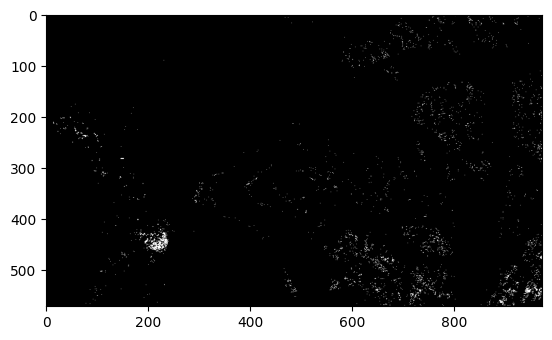

In [46]:
plt.imshow(thresh1, cmap='gray')

In [47]:
thresh1[thresh1==100].sum()

np.uint64(0)

# Построение гистограммы

In [48]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([b], [0], None, [histSize], histRange, accumulate=accumulate)

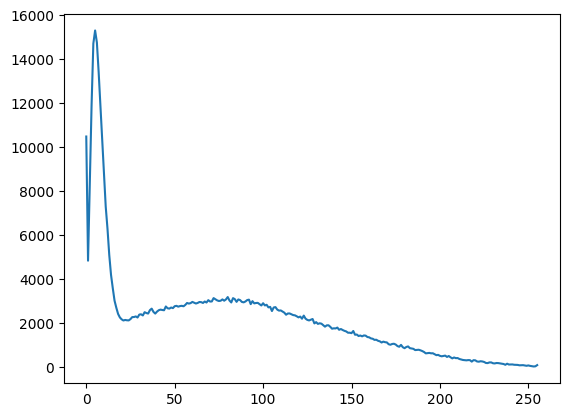

In [49]:
plt.plot(b_hist)

In [50]:
b_hist_cum = b_hist.cumsum()

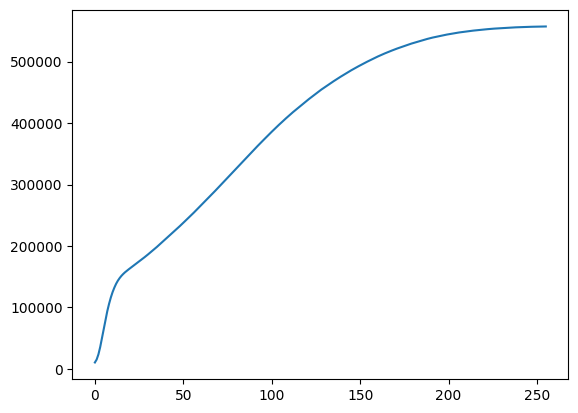

In [51]:
plt.plot(b_hist_cum)

In [52]:
b_hist_norm = b_hist /  (image.shape[0] * image.shape[1])

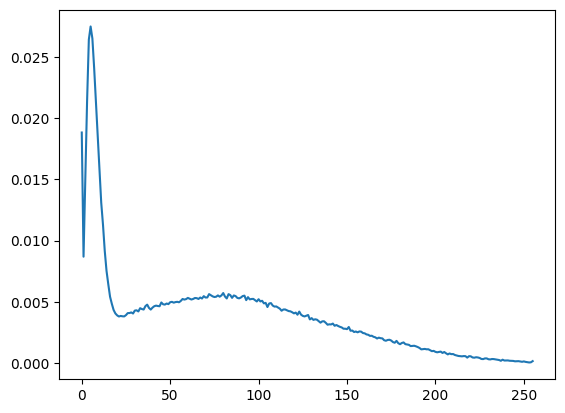

In [53]:
plt.plot(b_hist_norm)

# Сравнение двух изображений

In [54]:
from skimage.metrics import structural_similarity, mean_squared_error

(ssim, diff) = structural_similarity(image_gray, image_gray, full=True)
diff = (diff * 255).astype("uint8")
print("SSIM: {}".format(ssim))

SSIM: 1.0


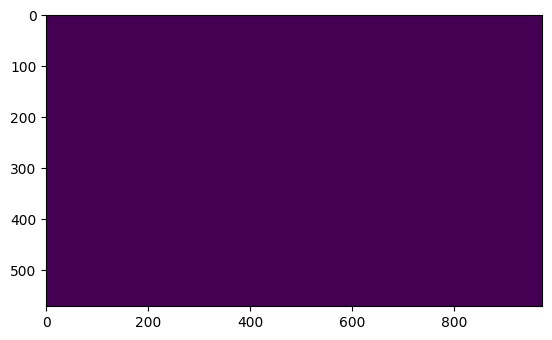

In [55]:
plt.imshow(diff)

In [56]:
mse = mean_squared_error(image_gray, image_gray)
mse

np.float64(0.0)

# Статистические характеристики изображений

In [57]:
mean = image_gray.mean()

In [58]:
std = image_gray.std()

In [59]:
print(mean,std)

67.41225535245043 52.016191875959635


In [60]:
eq_gray = cv2.equalizeHist(image_gray)

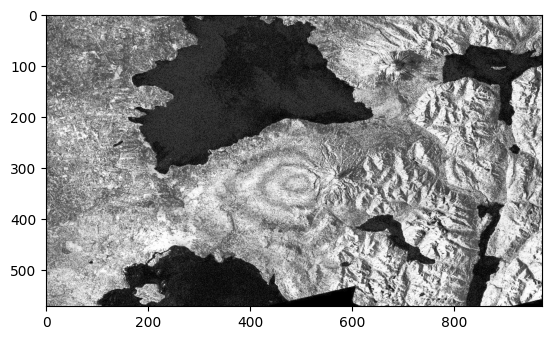

In [61]:
plt.imshow(eq_gray, cmap="gray")


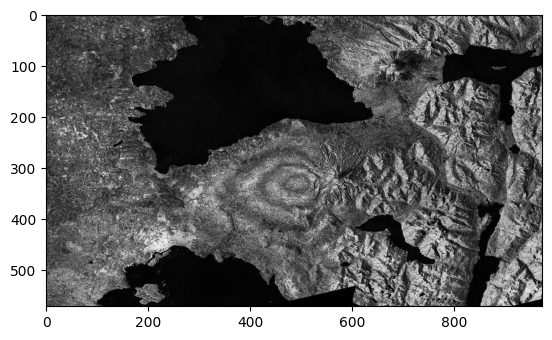

In [62]:
plt.imshow(image_gray, cmap="gray")

In [63]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат


In [74]:
# --- 1. Загрузка изображения в оттенках серого ---

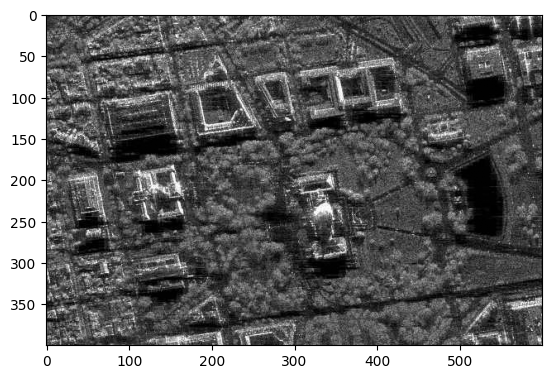

In [75]:
img_path = 'sar_1_gray.jpg'
img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

In [76]:
# --- 2. Построение гистограммы ---

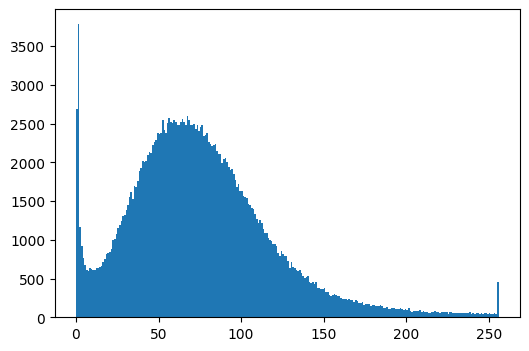

In [77]:
plt.figure(figsize=(6,4))
plt.hist(img.ravel(), bins=256, range=(0, 256))
plt.show()

In [78]:
# --- 3. Реализация гамма-коррекции ---

In [79]:
def mse(img1, img2):
    return np.mean((img1.astype('float32') - img2.astype('float32'))**2)

def compute_metrics(ref, test, name=''):
    m = mse(ref, test)
    s = ssim(ref, test, data_range=255)
    print(f'{name}  ->  MSE = {m:.4f},  SSIM = {s:.4f}')

In [80]:
def gamma_correction(image, gamma):
    img_norm = image.astype('float32') / 255.0
    img_gamma = np.power(img_norm, gamma)
    img_out = np.clip(img_gamma * 255.0, 0, 255).astype('uint8')
    return img_out

gamma1 = 0.5   # гамма < 1 (светлее)
gamma2 = 2.0   # гамма > 1 (темнее)

img_gamma_05 = gamma_correction(img, gamma1)
img_gamma_20 = gamma_correction(img, gamma2)

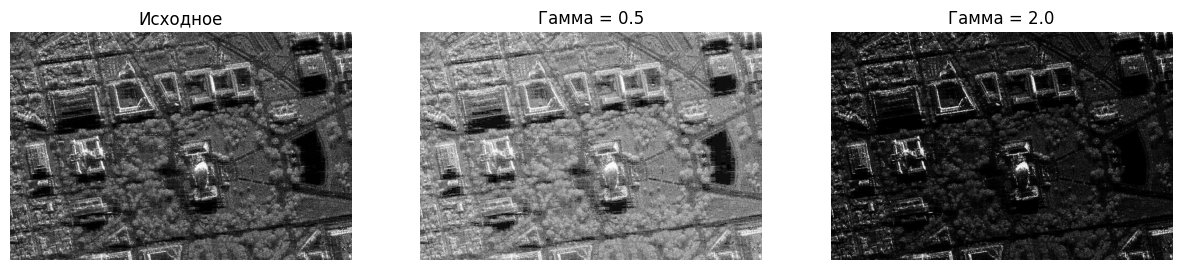

Гамма = 0.5  ->  MSE = 3250.4294,  SSIM = 0.7875
Гамма = 2.0  ->  MSE = 2383.7637,  SSIM = 0.5270


In [84]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.title('Исходное')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1,3,2)
plt.title(f'Гамма = {gamma1}')
plt.imshow(img_gamma_05, cmap='gray')
plt.axis('off')

plt.subplot(1,3,3)
plt.title(f'Гамма = {gamma2}')
plt.imshow(img_gamma_20, cmap='gray')
plt.axis('off')

plt.show()
compute_metrics(img, img_gamma_05, name=f'Гамма = {gamma1}')
compute_metrics(img, img_gamma_20, name=f'Гамма = {gamma2}')

In [85]:
# --- 4. Сравнение исходного и гамма-корректированных изображений ---

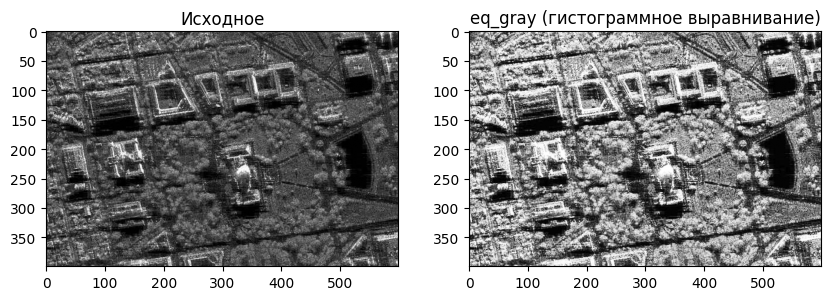

In [86]:
eq_gray = cv2.equalizeHist(img)

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title('Исходное')
plt.imshow(img, cmap='gray')
plt.subplot(1,2,2)
plt.title('eq_gray (гистограммное выравнивание)')
plt.imshow(eq_gray, cmap='gray')
plt.show()

In [87]:
# --- 5. Статистическая "цветокоррекция" на основе статистики eq_gray ---

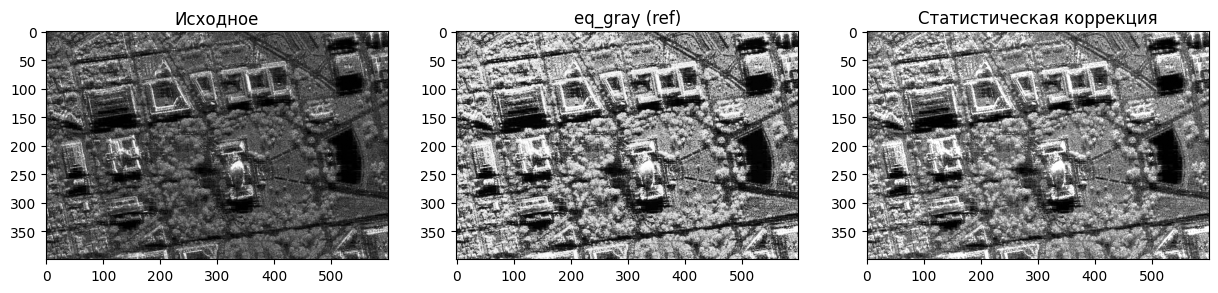

In [88]:
def statistical_tone_mapping(src, ref):
    src_f = src.astype('float32')
    ref_f = ref.astype('float32')

    mean_s, std_s = src_f.mean(), src_f.std()
    mean_r, std_r = ref_f.mean(), ref_f.std()
    out = (src_f - mean_s) / std_s * std_r + mean_r
    out = np.clip(out, 0, 255).astype('uint8')
    return out

img_stat = statistical_tone_mapping(img, eq_gray)

plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Исходное')
plt.imshow(img, cmap='gray')
plt.subplot(1,3,2)
plt.title('eq_gray (ref)')
plt.imshow(eq_gray, cmap='gray')

plt.subplot(1,3,3)
plt.title('Статистическая коррекция')
plt.imshow(img_stat, cmap='gray')
plt.show()

In [89]:
# --- 6. Тест пороговой фильтрации с различными параметрами ---

In [90]:
_, th_127 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
_, th_180 = cv2.threshold(img, 180, 255, cv2.THRESH_BINARY)

In [91]:
_, th_otsu = cv2.threshold(img, 0, 255,
                           cv2.THRESH_BINARY + cv2.THRESH_OTSU)

In [92]:
th_adapt_mean = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY,
    blockSize=31, C=5
)
th_adapt_gauss = cv2.adaptiveThreshold(
    img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY,
    blockSize=31, C=5
)

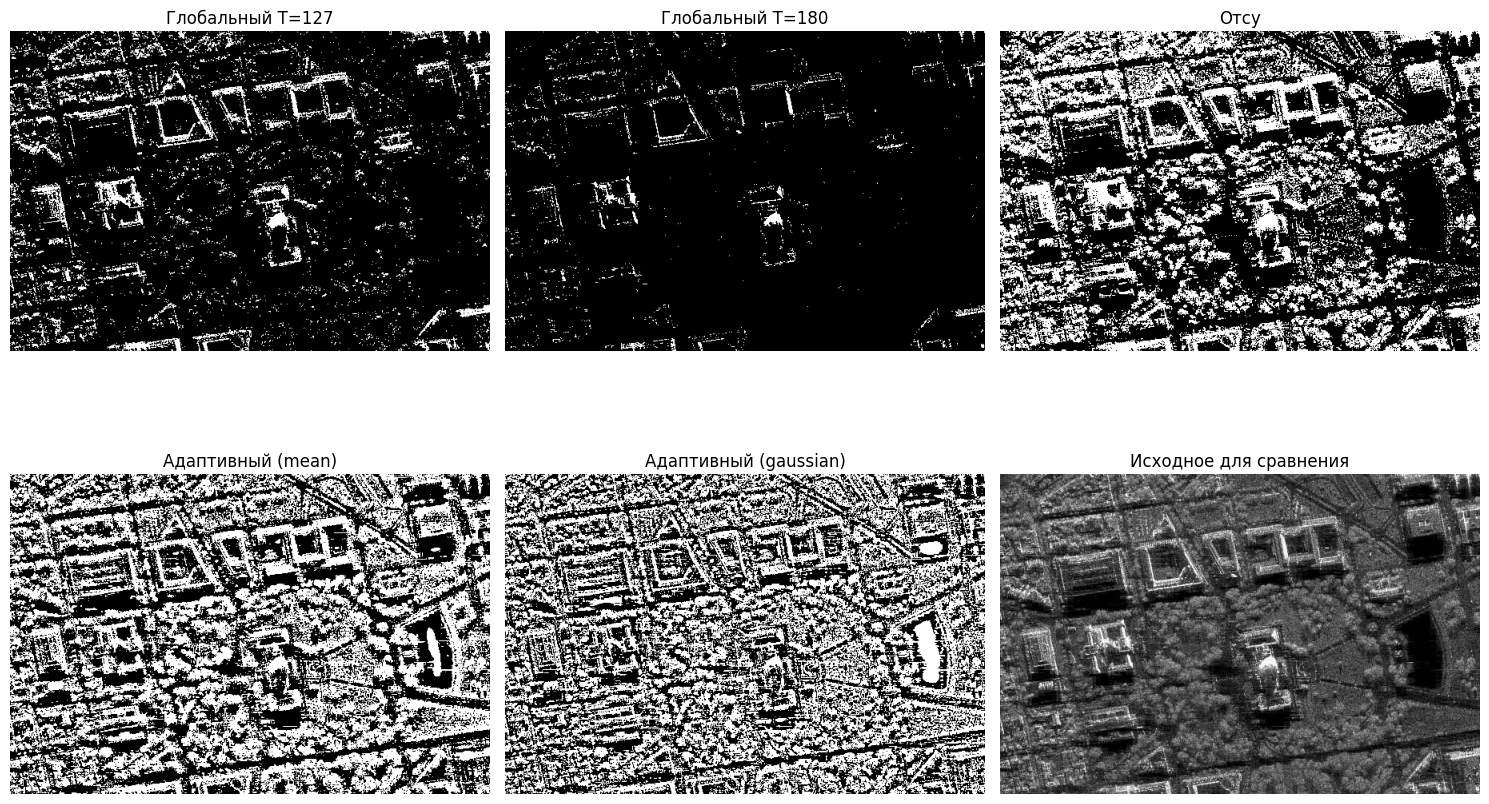

In [93]:
plt.figure(figsize=(15,10))

plt.subplot(2,3,1)
plt.title('Глобальный T=127')
plt.imshow(th_127, cmap='gray')
plt.axis('off')

plt.subplot(2,3,2)
plt.title('Глобальный T=180')
plt.imshow(th_180, cmap='gray')
plt.axis('off')

plt.subplot(2,3,3)
plt.title('Отсу')
plt.imshow(th_otsu, cmap='gray')
plt.axis('off')

plt.subplot(2,3,4)
plt.title('Адаптивный (mean)')
plt.imshow(th_adapt_mean, cmap='gray')
plt.axis('off')

plt.subplot(2,3,5)
plt.title('Адаптивный (gaussian)')
plt.imshow(th_adapt_gauss, cmap='gray')
plt.axis('off')

plt.subplot(2,3,6)
plt.title('Исходное для сравнения')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()